Change Working Directory

In [1]:
# |Set root for GPUDrive import
import os
import sys
from pathlib import Path

# Set working directory to the base directory 'gpudrive'
working_dir = Path.cwd()
while working_dir.name != 'gpudrive-CoDec':
    working_dir = working_dir.parent
    if working_dir == Path.home():
        raise FileNotFoundError("Base directory 'gpudrive' not found")
os.chdir(working_dir)
sys.path.append(str(working_dir))

In [2]:
import json
from copy import deepcopy

import numpy as np
import scipy as scp

import matplotlib.pyplot as plt

In [4]:
results_path = "examples/CoDec_Research/results/simulation_results/Results_Set1V2/"
results_file_paths = os.listdir(results_path)

all_results_dict = {}
for results_file in results_file_paths:
    if 'inference_results' in results_file:
        curr_file_path = results_path + results_file
        with open(curr_file_path, 'r') as curr_file:
            all_results_dict[results_file] = json.load(curr_file)

In [5]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 11}

plt.rc('font', **font)

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


-7.0
[1.27987561e-03 4.10015219e-03 1.21109425e-02 3.26926829e-02
 7.98662256e-02 1.74662083e-01 3.37814509e-01 5.69829728e-01
 8.24259931e-01 1.00000000e+00 9.86302494e-01 7.57040728e-01
 4.25614720e-01 1.54983197e-01 2.43236723e-02 5.91408736e-04
 6.41813334e-07 2.35191903e-11 7.10286716e-17 5.70466597e-23
 2.84094239e-29 1.42911585e-35 9.43473467e-42 8.90160999e-48
 1.14039193e-53 1.83847074e-59 3.62242919e-65 8.80574722e-71
 2.65670593e-76 9.70620677e-82 4.11478994e-87]
2.0
[5.78540324e-110 3.70683581e-103 2.70911187e-096 2.17990911e-089
 1.92477220e-082 1.83150486e-075 1.79839251e-068 1.75169265e-061
 1.69080782e-054 1.71190704e-047 1.97985075e-040 2.60991357e-033
 3.22610043e-026 2.52898427e-019 6.49054761e-013 1.75795209e-007
 1.36367804e-003 1.90153032e-001 1.00000000e+000 6.61201329e-001
 1.43471000e-001 1.80865671e-002 1.80003304e-003 1.66503843e-004
 1.55994004e-005 1.54165614e-006 1.62826113e-007 1.83323450e-008
 2.17933680e-009 2.70488164e-010 3.46880946e-011]
0.0
[1.79835

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

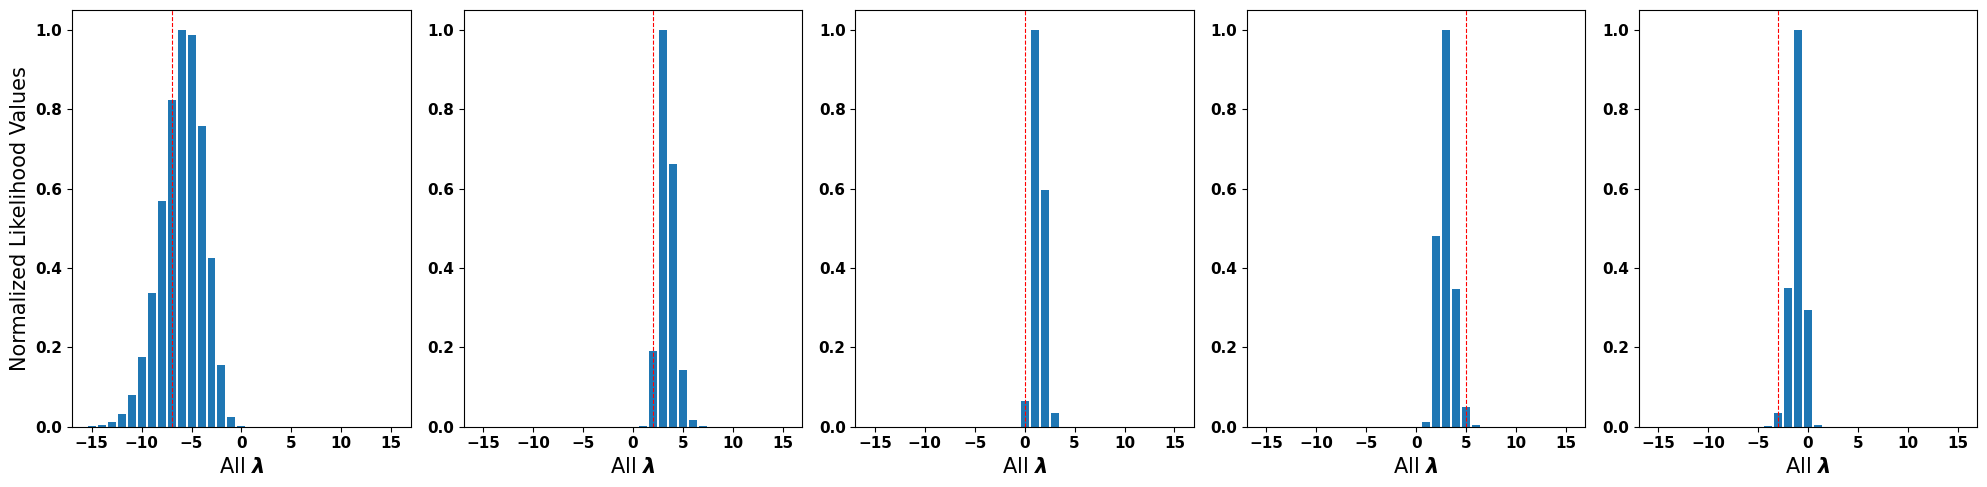

In [6]:
fig, ax = plt.subplots(1, len(all_results_dict), figsize=(20, 5))

all_results_dict_copy = deepcopy(all_results_dict)
for iter, file_info in enumerate(all_results_dict_copy.values()):
    true_val = file_info.pop('TrueParams')['rel_heading']
    log_likelihoods = -1*np.array(list(file_info.values()))
    log_likelihoods -= log_likelihoods.max()    # Normalize
    likelihoods = np.exp(log_likelihoods)       # Convert to probabilities
    # likelihoods = scp.special.softmax(likelihoods)  # Softmax values

    ax[iter].bar(range(-15,16), likelihoods)
    # ax[iter].set_title(f"True $\\lambda$ = {true_val}")
    ax[iter].set_xlabel("All $\\lambda$", fontsize=15)
    ax[iter].axvline(x=true_val, color="red", lw=0.8, ls='--')
    
    print(true_val)
    print(likelihoods)

ax[0].set_ylabel("Normalized Likelihood Values", fontsize=15)
plt.tight_layout()
plt.savefig(results_path+"inferencePlots.pdf")
plt.show()